<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><b>CAR PRICE PREDICTION </b>
</div>


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>INSTALL DEPENDENCIES </b>
</div>

In [57]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>IMPORT THE NEEDED TOOLKIT </b>
</div>

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

import warnings
warnings.filterwarnings("ignore")

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET LAODING .. </b>
</div>

In [3]:
df = pd.read_csv("cars_data.csv")

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY A SAMPLE  </b>
</div>

In [5]:
df.sample(4)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
188,Isuzu,Rodeo S,SUV,Asia,Front,"$20,449",3.2,6.0,193,17,21,3836,106,178
290,Mitsubishi,Lancer LS 4dr,Sedan,Asia,Front,"$16,722",2.0,4.0,120,25,31,2795,102,181
398,Toyota,Tundra Regular Cab V6,Truck,Asia,Rear,"$16,495",3.4,6.0,190,16,18,3925,128,218
162,Honda,Accord EX V6 2dr,Sedan,Asia,Front,"$26,960",3.0,6.0,240,21,30,3294,105,188


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET SUMMARY </b>
</div>

In [36]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
Make,object,0,0.000000,38,428
Model,object,0,0.000000,425,428
Type,object,0,0.000000,6,428
Origin,object,0,0.000000,3,428
DriveTrain,object,0,0.000000,3,428
MSRP,int32,0,0.000000,410,428
EngineSize,float64,0,0.000000,43,428
Cylinders,float64,2,0.004673,7,426
Horsepower,int64,0,0.000000,110,428
MPG_City,int64,0,0.000000,28,428


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA PLOTTING</b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Visualize to get main Insughts !
   
    


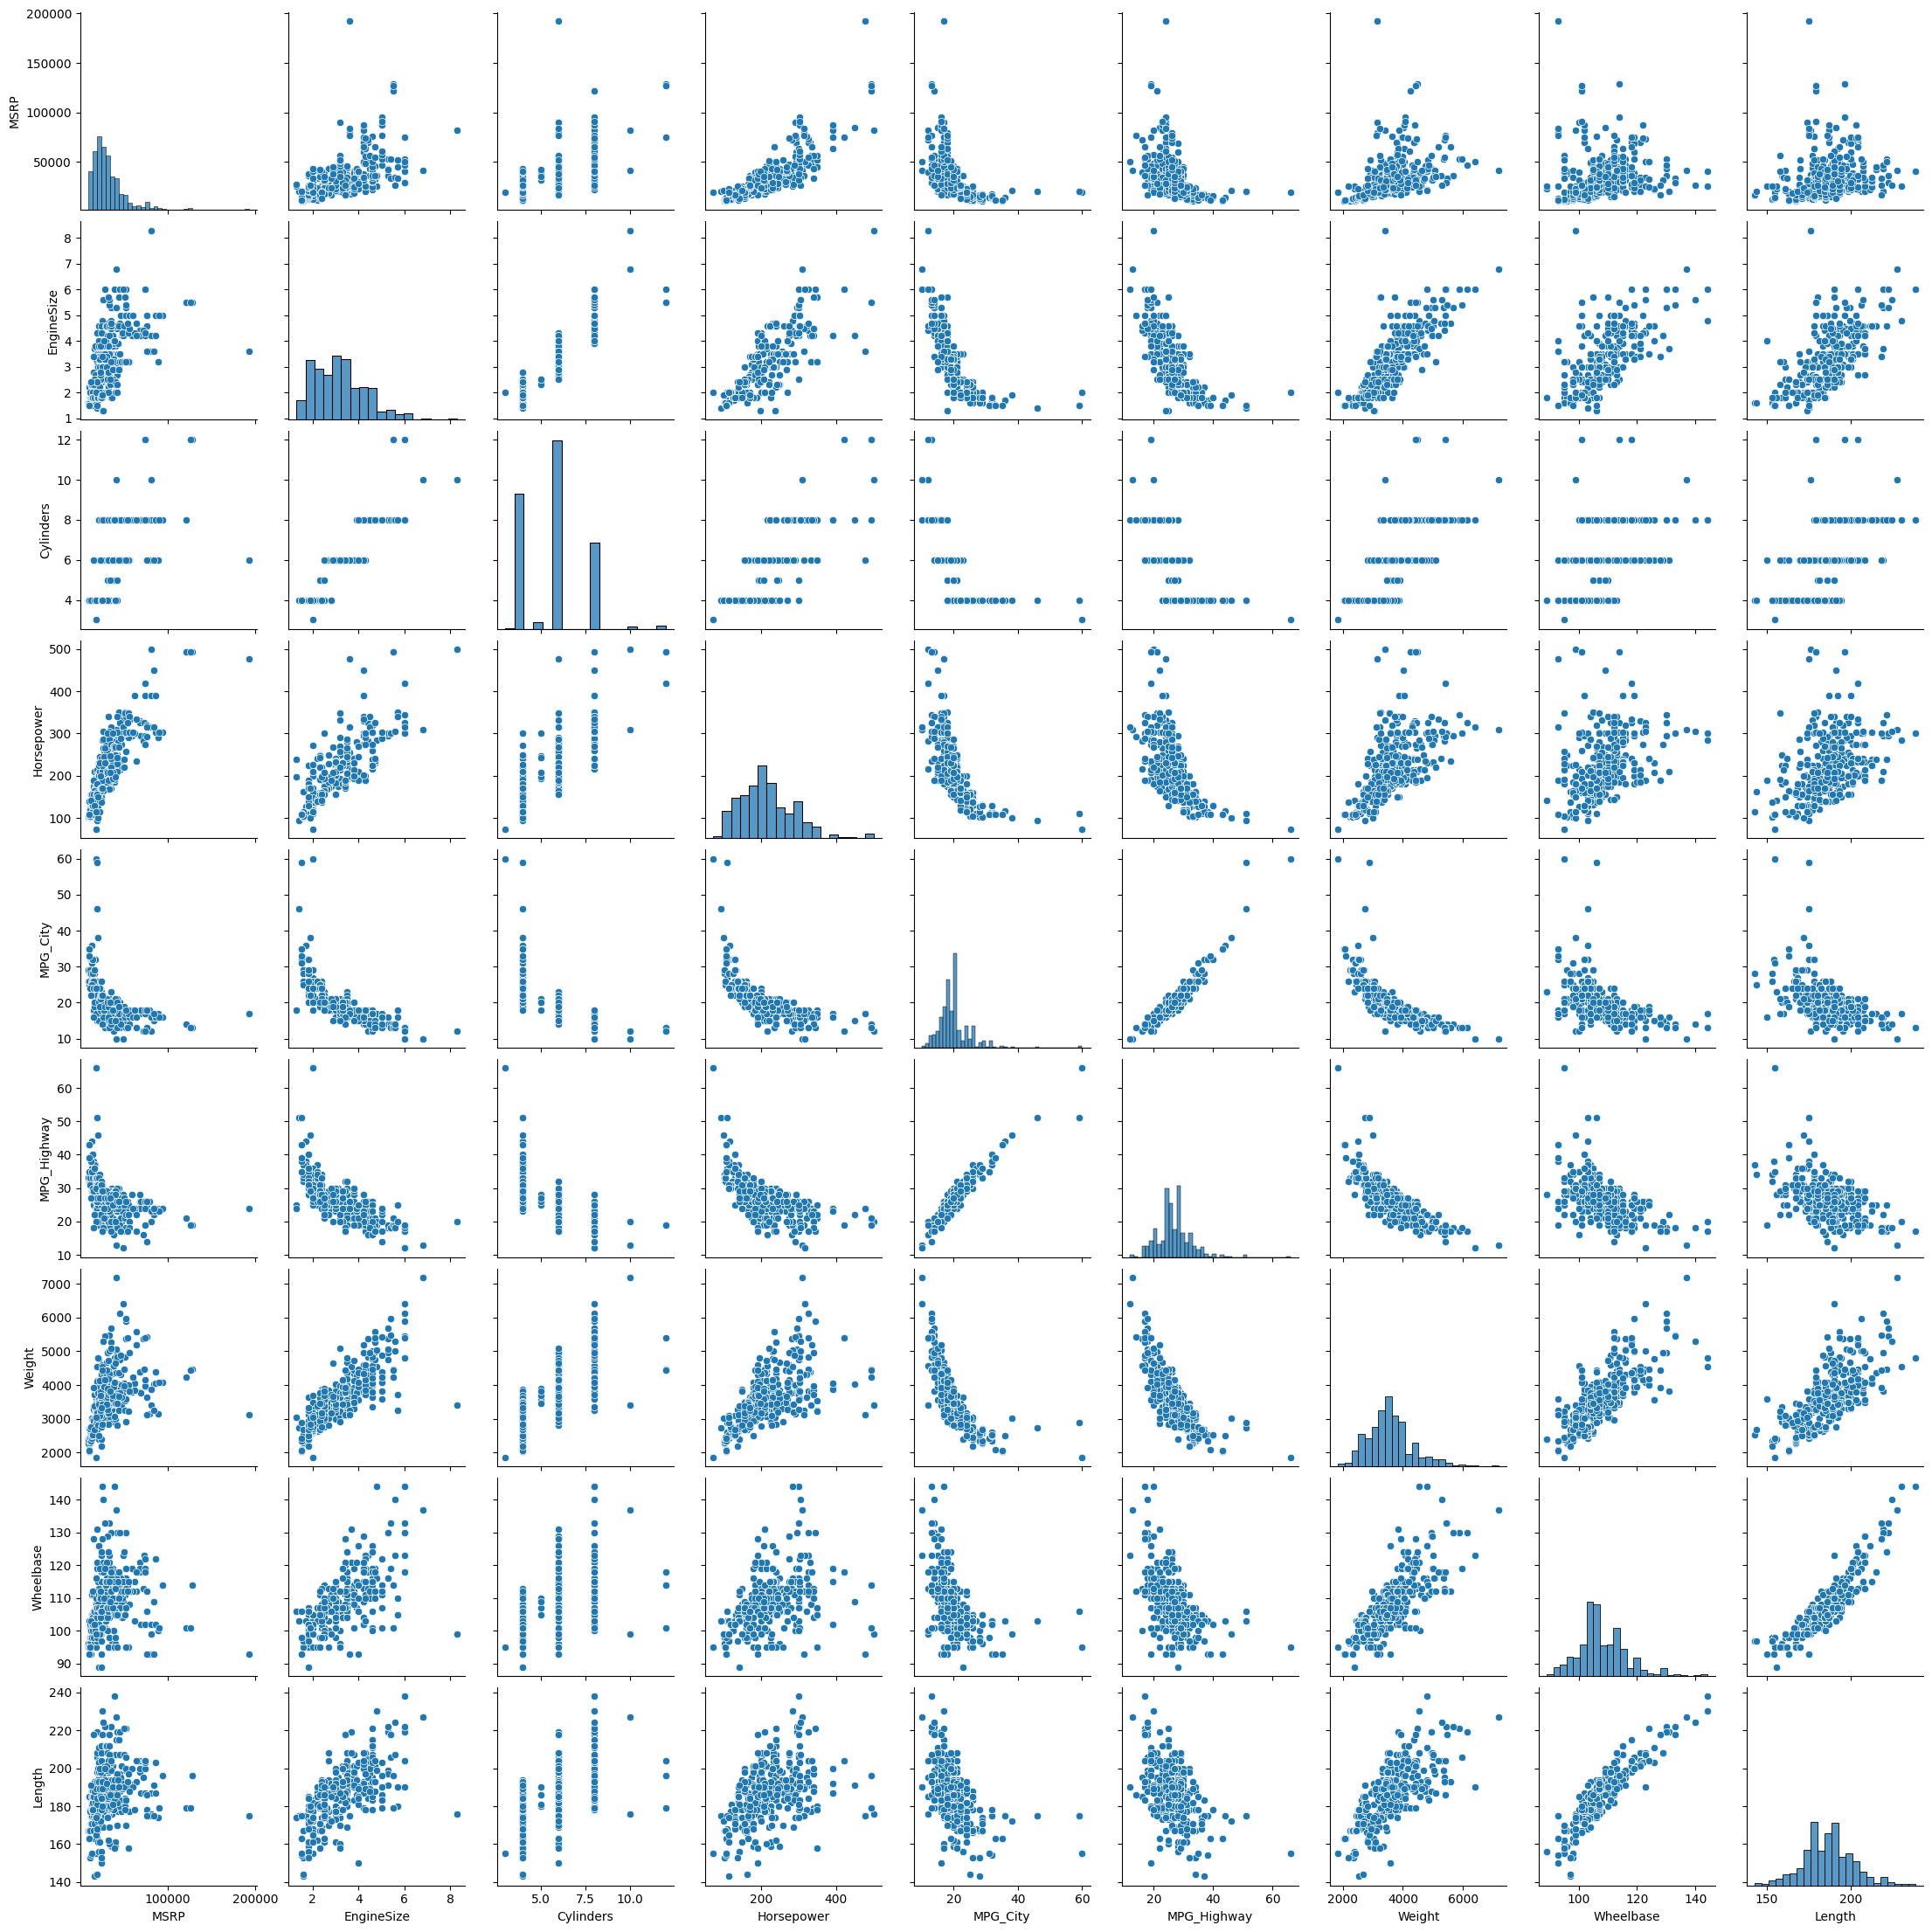

In [11]:
sns.pairplot(df)

In [18]:
fig = px.histogram(df, x="Make",
                  labels={"Make": "Manufacturer"},
                  title="Manufacturer of the car",
                  color="Make")

fig.show()

In [21]:
fig = px.pie(df, names="Origin",
             title="Origin of the car",
             labels={"Origin": "Origin of car"},
             color_discrete_sequence=["blue"])

fig.update_traces(pull=[0.1, 0])  # Adding an explode effect by pulling the first slice slightly out

fig.show()


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA PRE-PROCESSING </b>
</div>

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>[MSRP] ---> PRICE </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Remove the ($) sign and the Comma (,) 
   
    


In [8]:
df["MSRP"].head(3)

0    $36,945
1    $23,820
2    $26,990
Name: MSRP, dtype: object

In [9]:
df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype("int")

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Check Again !
   
    


In [10]:
df["MSRP"].head(3)

0    36945
1    23820
2    26990
Name: MSRP, dtype: int32

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Label Encoder  </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Use Label Encoder for ----> ['Make', 'Model', 'Type', 'Origin', 'DriveTrain']
   
    


In [37]:
from sklearn.preprocessing import LabelEncoder

def encode_column(df, column_name):
    # Initialize a label encoder
    le = LabelEncoder()

    # Fit the encoder and transform the column
    df[column_name] = le.fit_transform(df[column_name])

    # Return the updated dataframe
    return df[column_name].sample(3)


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Make Encoding ..
   
    


In [38]:
encode_column(df,'Make')

204    17
427    37
375    35
Name: Make, dtype: int32

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Model Encoding ..
   
    


In [41]:
encode_column(df,'Model')

200    410
85     110
426    389
Name: Model, dtype: int32

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Type Encoding ..
   
    


In [44]:
encode_column(df,'Type')

386    2
291    2
415    5
Name: Type, dtype: int32

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Origin Encoding ..
   
    


In [43]:
encode_column(df,'Origin')

427    1
214    0
211    0
Name: Origin, dtype: int32

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  DriveTrain Encoding ..
   
    


In [42]:
encode_column(df,'DriveTrain')

269    2
162    1
255    2
Name: DriveTrain, dtype: int32

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Correlation Analysis  </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Choose the suitable datatyped Columns
   

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

<Axes: >

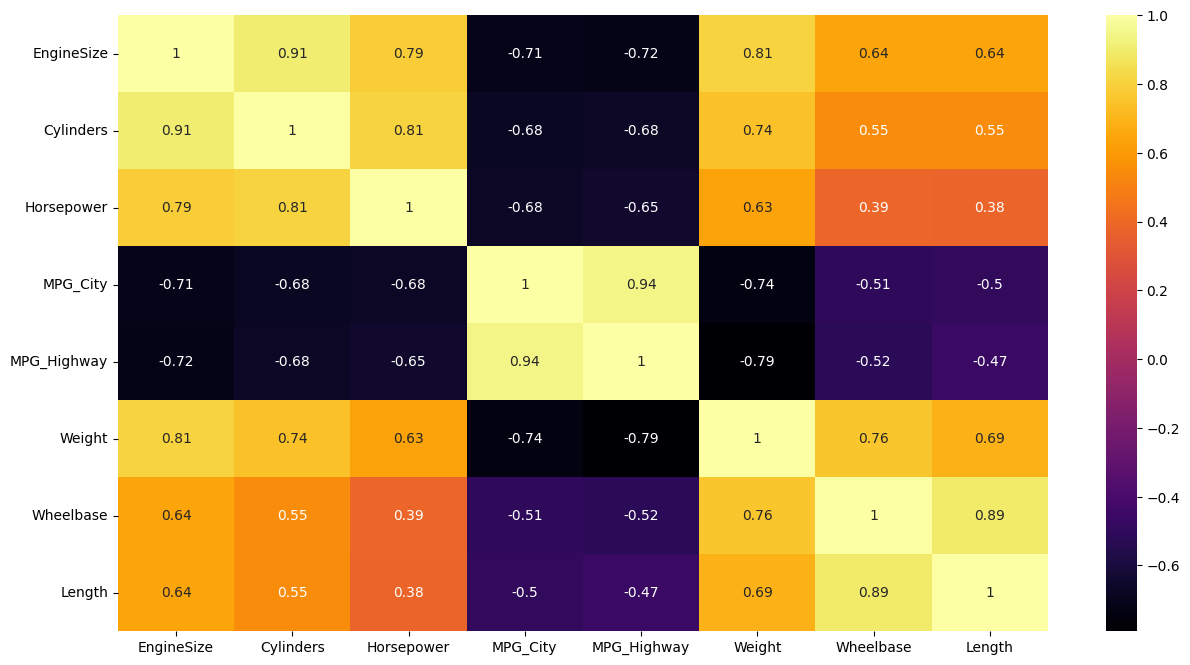

In [35]:
sns.color_palette("rocket", as_cmap=True)

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, cmap= "inferno", annot=True)

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET FINAL LOOK  </b>
</div>

In [45]:
df.sample(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
266,23,134,2,1,2,57270,5.0,8.0,302,16,20,3815,112,190
156,10,108,2,0,1,15850,1.7,4.0,115,32,38,2513,103,175
230,20,67,1,2,1,42915,4.6,8.0,302,13,18,4834,114,193
191,15,308,2,1,2,43895,3.0,6.0,235,18,26,3777,115,192
318,27,350,2,2,1,28790,3.4,6.0,185,19,26,3948,120,201


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Ready for the ML Model
   
    


<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Determine Predictor & Target  </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Set the Predictor ..
   
    


In [47]:
X = df.drop("MSRP", axis=1)

In [48]:
X.sample(3)

,Make,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
144,9,334,2,2,2,4.3,6.0,190,16,20,4309,111,190
201,16,182,1,2,1,4.0,6.0,195,16,21,3790,106,181
242,22,244,2,0,1,2.3,4.0,160,25,31,2762,104,179


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Set the Target ..
   
    


In [49]:
y = df["MSRP"]

In [50]:
y.sample(3)

98     25215
424    42565
274    33780
Name: MSRP, dtype: int32

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  All in the Form of a Numpy Array ..
   
    


In [51]:
X = np.array(X)
y= np.array(y)

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA SPLIT ...  </b>
</div>

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

In [54]:
X_train.shape

(342, 13)

In [55]:
X_test.shape

(86, 13)

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Building The Model </b>
</div>

In [58]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Model Training ...
   
    


In [59]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Model Evaluation ...
   
    


In [60]:
xgb_model.score(X_test, y_test)

0.7047893859872055

<div style='border: 3px solid non; background-color: #e3e3e3; font-family: Times New Roman; font-size: 110%; padding: 10px'>
    Model Accuracy is not good enough ...<br>
    Try to use the Hyper Parameters ...
</div>


In [64]:
# Get the best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
xgb_model_optimized = XGBRegressor(**best_params)

# Fit the model
xgb_model_optimized.fit(X_train, y_train)

# Evaluate the model
score = xgb_model_optimized.score(X_test, y_test)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Model Evaluation ...
   

In [65]:
score

0.8092282215479795

<div style="padding:10px;
            color:#0cdefa;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Model Performance & Behavior </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Feature Importance Plot
   

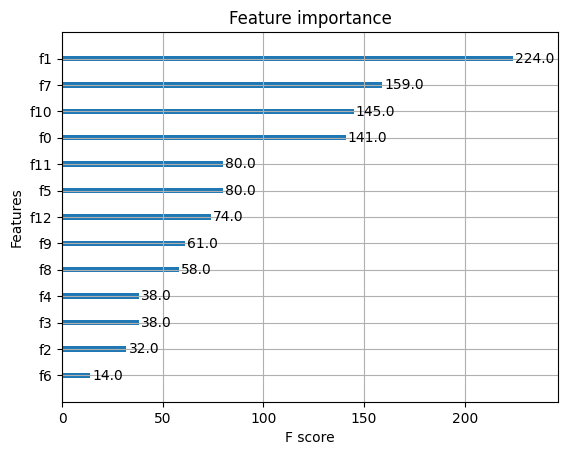

In [66]:
from xgboost import plot_importance

plot_importance(xgb_model_optimized)
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Partial Dependence Plot (PDP)
   

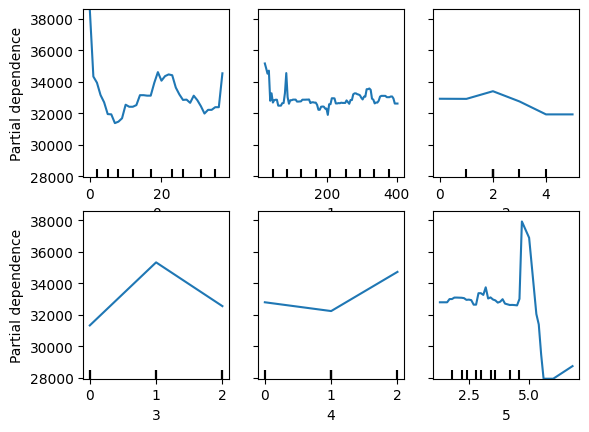

In [73]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(xgb_model_optimized, X_train, features=[0, 1, 2, 3, 4, 5])  # Specify the feature indices you want to visualize
plt.show()

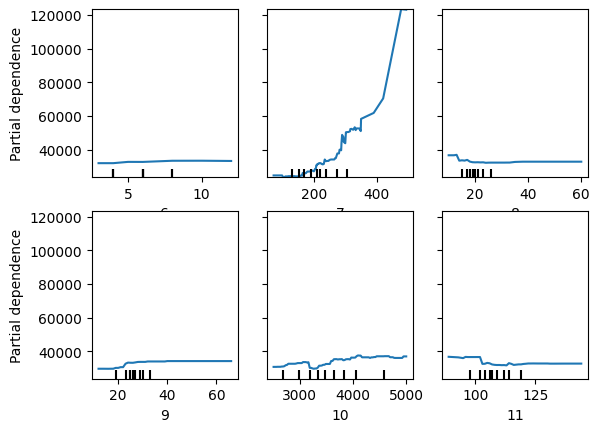

In [75]:
plot_partial_dependence(xgb_model_optimized, X_train, features=[ 6, 7, 8, 9, 10, 11])  # Specify the feature indices you want to visualize
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Prediction vs. Actual Plot
   

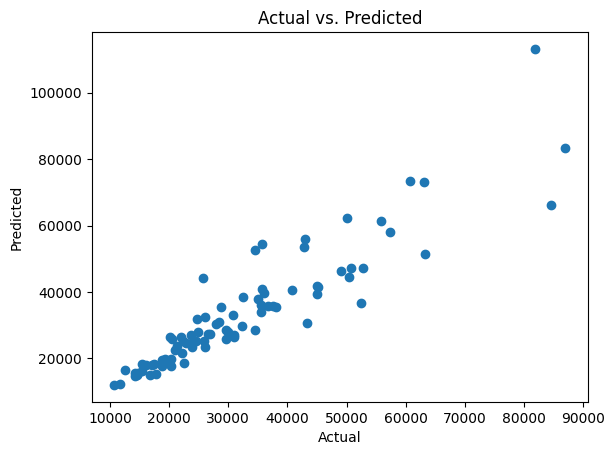

In [77]:
y_pred = xgb_model_optimized.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Learning Curve Plot
   

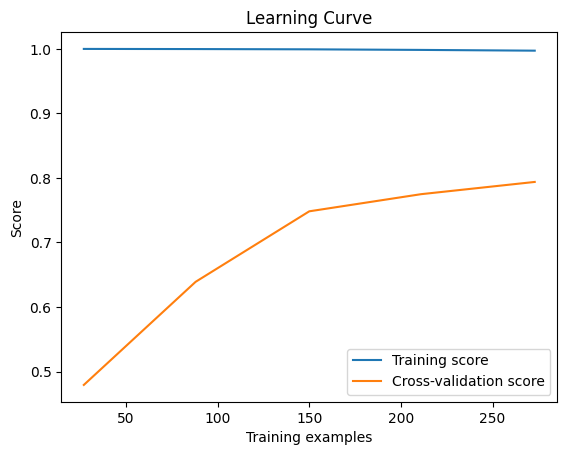

In [80]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb_model_optimized, X_train, y_train)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
